In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\klsis\anaconda3\envs\penn_flask\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [4]:
!pip install pyforest
from pyforest import*

lazy_imports()

['from openpyxl import load_workbook',
 'import lightgbm as lgb',
 'import spacy',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import glob',
 'import datetime as dt',
 'import os',
 'import dash',
 'import sklearn',
 'import tqdm',
 'import pandas as pd',
 'import statistics',
 'import numpy as np',
 'import keras',
 'import gensim',
 'import re',
 'from sklearn.ensemble import RandomForestClassifier',
 'import awswrangler as wr',
 'import altair as alt',
 'from sklearn import svm',
 'from sklearn.manifold import TSNE',
 'import pydot',
 'import seaborn as sns',
 'from pathlib import Path',
 'import matplotlib.pyplot as plt',
 'from sklearn.ensemble import RandomForestRegressor',
 'import tensorflow as tf',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.model_selection import train_test_split',
 'import nltk',
 'import sys',
 'import plotly.graph_objs as go',
 'import xgboost as xgb',
 'import bokeh',
 'import plotly as py',
 'from pyspark import S

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("breast_cancer.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
# Drop the column id
df=df.iloc[:,1:]
df.head()

<IPython.core.display.Javascript object>

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

# EXPLORATORY DATA ANALYSIS

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### Bivariate Data Analysis

<IPython.core.display.Javascript object>

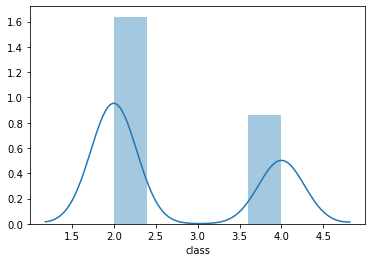

In [8]:
sns.distplot(df['class']);

### Multivariate Data Analysis

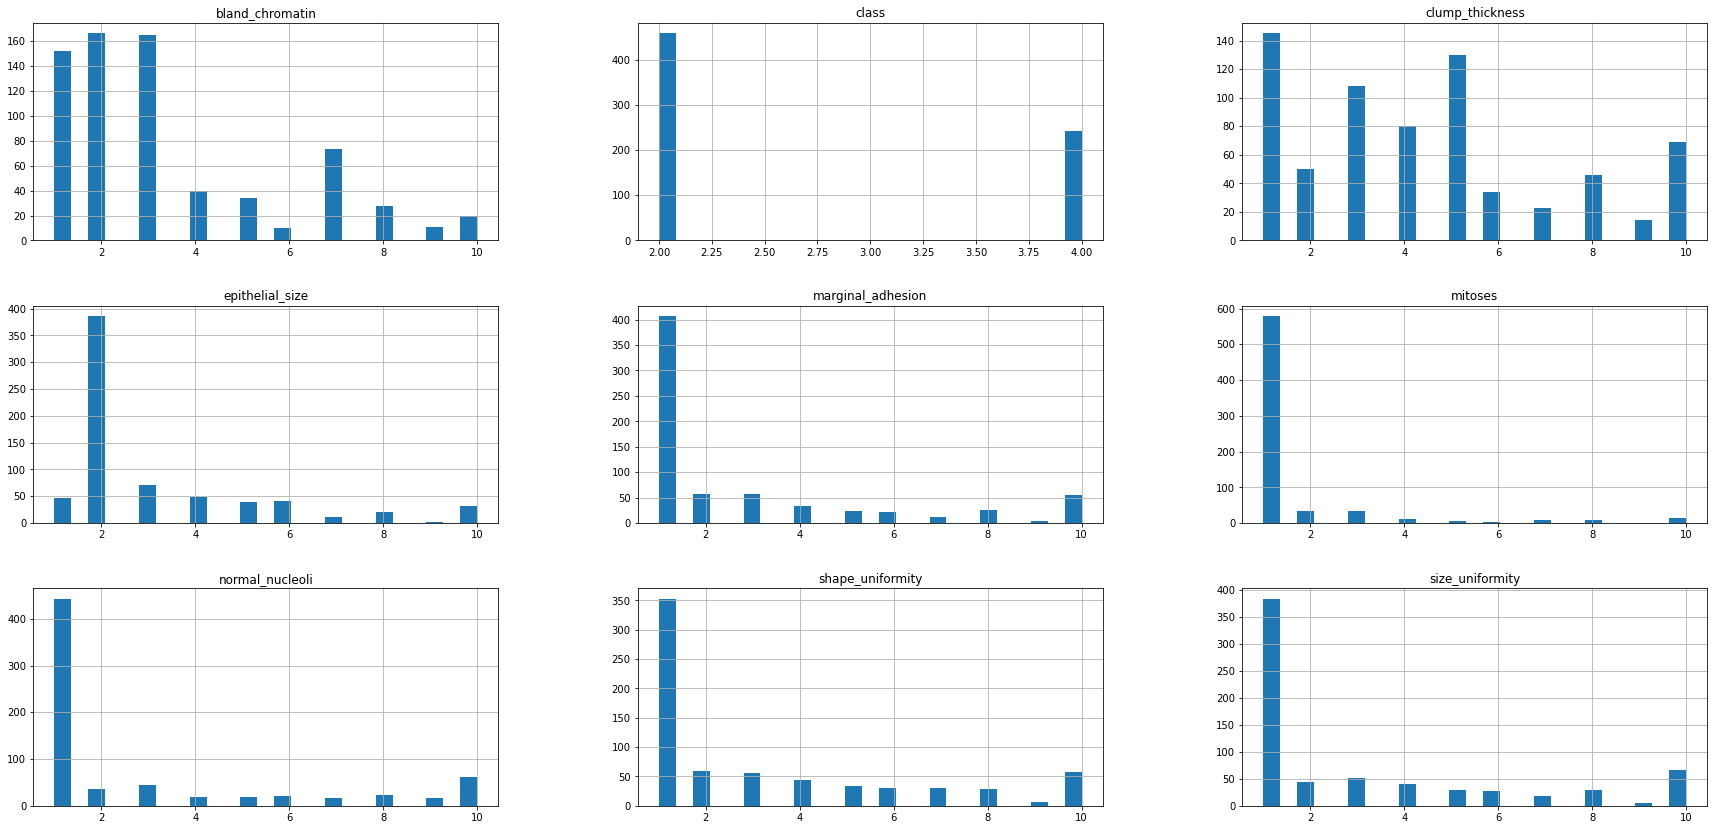

In [9]:
df.hist(bins=25, figsize=(30,30), layout=(6,3));

In [10]:
X=df.drop('class', axis=1)
y=df['class']

In [11]:
df = X.copy()

df_binary_encoded = pd.get_dummies(df, columns=["bare_nucleoli"])
df_binary_encoded.head()

<IPython.core.display.Javascript object>

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,bare_nucleoli_1,bare_nucleoli_10,bare_nucleoli_2,bare_nucleoli_3,bare_nucleoli_4,bare_nucleoli_5,bare_nucleoli_6,bare_nucleoli_7,bare_nucleoli_8,bare_nucleoli_9,bare_nucleoli_?
0,5,1,1,1,2,3,1,1,1,0,0,0,0,0,0,0,0,0,0
1,5,4,4,5,7,3,2,1,0,1,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,3,1,1,0,0,1,0,0,0,0,0,0,0,0
3,6,8,8,1,3,3,7,1,0,0,0,0,1,0,0,0,0,0,0
4,4,1,1,3,2,3,1,1,1,0,0,0,0,0,0,0,0,0,0


In [22]:
df_binary_encoded.dtypes

clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
bare_nucleoli_1      uint8
bare_nucleoli_10     uint8
bare_nucleoli_2      uint8
bare_nucleoli_3      uint8
bare_nucleoli_4      uint8
bare_nucleoli_5      uint8
bare_nucleoli_6      uint8
bare_nucleoli_7      uint8
bare_nucleoli_8      uint8
bare_nucleoli_9      uint8
bare_nucleoli_?      uint8
dtype: object

In [12]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

<IPython.core.display.Javascript object>

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,bare_nucleoli_1,bare_nucleoli_10,bare_nucleoli_2,bare_nucleoli_3,bare_nucleoli_4,bare_nucleoli_5,bare_nucleoli_6,bare_nucleoli_7,bare_nucleoli_8,bare_nucleoli_9,bare_nucleoli_?
163,1,1,1,2,1,1,1,7,0,0,0,1,0,0,0,0,0,0,0
286,10,10,10,10,10,4,10,10,0,1,0,0,0,0,0,0,0,0,0
612,8,10,10,10,6,10,10,10,0,1,0,0,0,0,0,0,0,0,0
517,1,1,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0
464,4,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0


# Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [13]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model

k: 1, Train/Test Score: 1.000/0.954
k: 3, Train/Test Score: 0.975/0.954
k: 5, Train/Test Score: 0.969/0.954
k: 7, Train/Test Score: 0.966/0.954
k: 9, Train/Test Score: 0.962/0.960
k: 11, Train/Test Score: 0.960/0.949
k: 13, Train/Test Score: 0.958/0.949
k: 15, Train/Test Score: 0.956/0.949
k: 17, Train/Test Score: 0.958/0.943
k: 19, Train/Test Score: 0.954/0.937


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

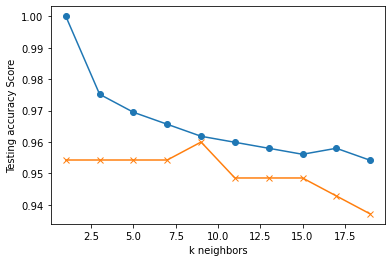

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
# Note that k:9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_minmax, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=9 Test Acc: 0.960


## Save the Model

In [21]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn.sav'
joblib.dump(knn, filename)

['knn.sav']